### Imports
Importazioni dei pacchetti e inizializzazioni varie

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import os
import traceback


import pandas as pd

## Analisi Discount Factor
Di seguito studieremo l'impatto che ha il discount factor sulle performance dell'agente. Facendo variare il discount factor da 0.1 a 0.9, con passo di 0.1, andremo a valutare l'andamento del win rate medio calcolato su 1000 episodi. I restanti valori saranno immutati.


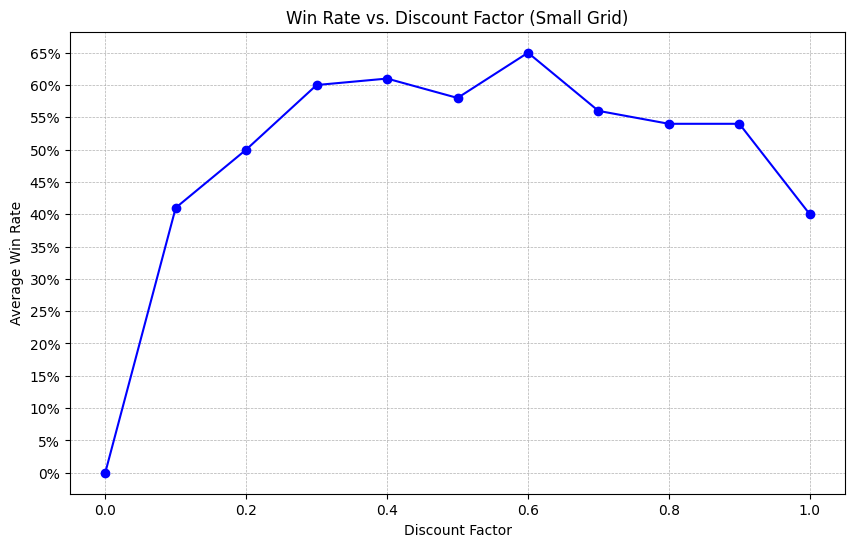

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

input_csv_path = 'test_01_discount_factor_smallGrid.csv'
df = pd.read_csv(input_csv_path)

# Estraggo le colonne DISCOUNT_FACTOR e Win rate
discount_factors = df['DISCOUNT_FACTOR']
win_rates = df['Win Rate']

# Funzione per formattare le ordinate in percentuale
def to_percent(y, position):
    return f'{y * 100:.0f}%'

# Creo il grafico
plt.figure(figsize=(10, 6))
plt.plot(discount_factors, win_rates, marker='o', linestyle='-', color='b')
plt.title("Win Rate vs. Discount Factor (Small Grid)")
plt.xlabel("Discount Factor")
plt.ylabel("Average Win Rate")

# Imposto la formattazione delle ordinate in percentuale
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# Imposto l'intervallo dei tick sull'asse y a 0.05 (5%)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

# Aggiungo una griglia più fitta
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Dal seguente grafico risulta che il discount factor migliore è 0.6 con un win rate medio di circa 65%

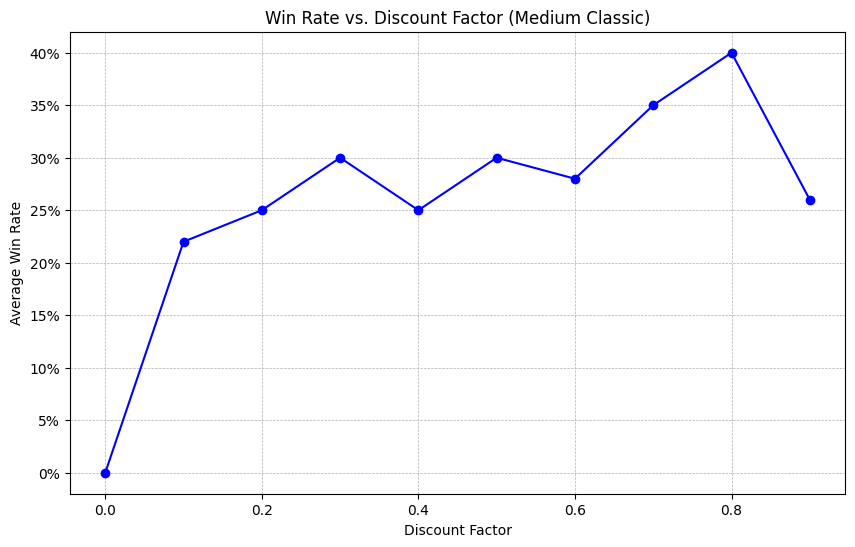

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

input_csv_path = 'test_02_discount_factor_mediumClassic.csv'
df = pd.read_csv(input_csv_path)

# Estraggo le colonne DISCOUNT_FACTOR e Win rate
discount_factors = df['DISCOUNT_FACTOR']
win_rates = df['Win Rate']

# Funzione per formattare le ordinate in percentuale
def to_percent(y, position):
    return f'{y * 100:.0f}%'

# Creo il grafico
plt.figure(figsize=(10, 6))
plt.plot(discount_factors, win_rates, marker='o', linestyle='-', color='b')
plt.title("Win Rate vs. Discount Factor (Medium Classic)")
plt.xlabel("Discount Factor")
plt.ylabel("Average Win Rate")

# Imposto la formattazione delle ordinate in percentuale
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# Imposto l'intervallo dei tick sull'asse y a 0.05 (5%)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

# Aggiungo una griglia più fitta
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

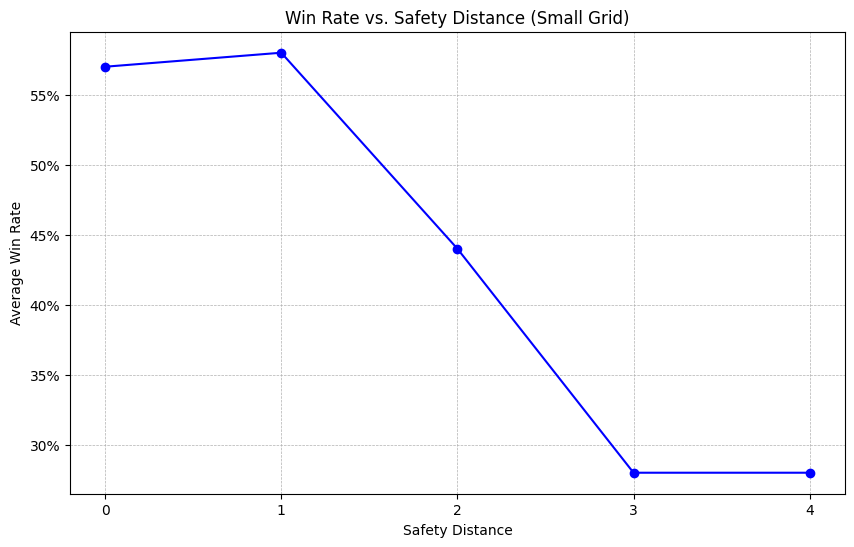

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

input_csv_path = 'test_03_safety_distance_smallGrid.csv'
df = pd.read_csv(input_csv_path)

# Estraggo le colonne SAFETY_DISTANCE e Win rate
safety_distances = df['SAFETY_DISTANCE']
win_rates = df['Win Rate']

# Funzione per formattare le ordinate in percentuale
def to_percent(y, position):
    return f'{y * 100:.0f}%'

# Creo il grafico
plt.figure(figsize=(10, 6))
plt.plot(safety_distances, win_rates, marker='o', linestyle='-', color='b')
plt.title("Win Rate vs. Safety Distance (Small Grid)")
plt.xlabel("Safety Distance")
plt.ylabel("Average Win Rate")

# Imposto la formattazione delle ordinate in percentuale
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# Imposto l'intervallo dei tick sull'asse y a 0.05 (5%)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

# Imposto l'intervallo dei tick sull'asse x a 1
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

# Aggiungo una griglia più fitta
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Nel caso dell'ambiente smallGrid, possiamo notare che la safety distance migliore è 0.

### Test sulla safety distance e la ghostbuster mode

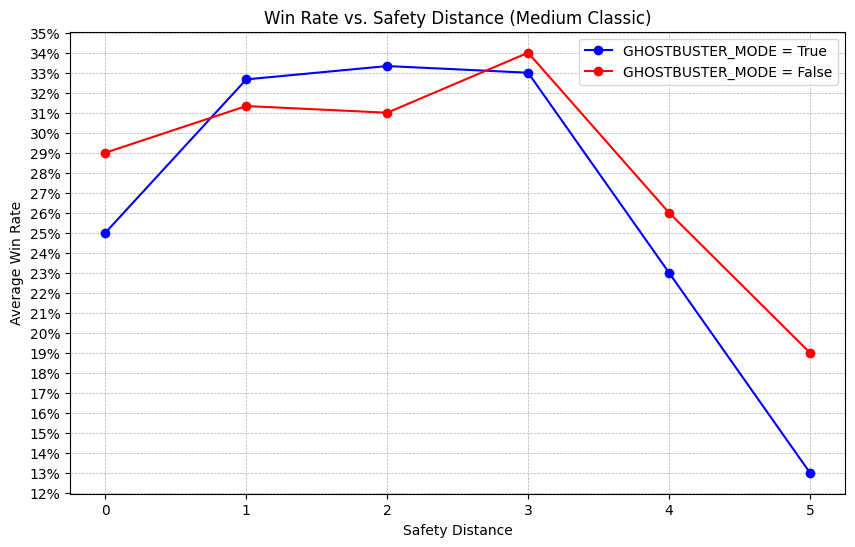

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

input_csv_path = 'test_04_safety_distance_and_ghostbuster_mode_mediumClassic.csv'
df = pd.read_csv(input_csv_path)

# Convertire GHOST_BUSTER_MODE in booleano
df['GHOSTBUSTER_MODE'] = df['GHOSTBUSTER_MODE'].astype(str).str.lower() == 'true'

# Raggruppare i dati per tutte le colonne tranne WIN_RATE e calcolare la media di WIN_RATE
grouped_df = df.groupby(['FOOD_REWARD', 'GHOST_REWARD', 'DANGER_ZONE_REWARD', 'CAPSULE_REWARD', 
                         'BLANK_REWARD', 'THETA', 'DISCOUNT_FACTOR', 'SAFETY_DISTANCE', 
                         'GHOSTBUSTER_MODE', 'MAX_ITERATIONS', 'NOISE']).mean().reset_index()

# Filtrare i dati per GHOST_BUSTER_MODE a True e False
df_true = grouped_df[grouped_df['GHOSTBUSTER_MODE'] == True]
df_false = grouped_df[grouped_df['GHOSTBUSTER_MODE'] == False]

def to_percent(y, position):
    """
    Funzione per formattare le ordinate in percentuale.
    
    Args:
        y: Il valore sull'asse y.
        position: La posizione sull'asse y (non utilizzata).
    
    Returns:
        Una stringa che rappresenta il valore in percentuale.
    """
    return f'{y * 100:.0f}%'

# Creo il grafico
plt.figure(figsize=(10, 6))

# Plottare i dati per GHOST_BUSTER_MODE a True
plt.plot(df_true['SAFETY_DISTANCE'], df_true['Win Rate'], marker='o', linestyle='-', color='b', label='GHOSTBUSTER_MODE = True')

# Plottare i dati per GHOST_BUSTER_MODE a False
plt.plot(df_false['SAFETY_DISTANCE'], df_false['Win Rate'], marker='o', linestyle='-', color='r', label='GHOSTBUSTER_MODE = False')

plt.title("Win Rate vs. Safety Distance (Medium Classic)")
plt.xlabel("Safety Distance")
plt.ylabel("Average Win Rate")

# Imposto la formattazione delle ordinate in percentuale
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# Imposto l'intervallo dei tick sull'asse y a 0.05 (5%)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.01))

# Imposto l'intervallo dei tick sull'asse x a 1
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

# Aggiungo una griglia più fitta
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Aggiungo la legenda
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

input_csv_path = 'test_04_safety_distance_and_ghostbuster_mode_mediumClassic.csv'
df = pd.read_csv(input_csv_path)

# Convertire GHOSTBUSTER_MODE in booleano
df['GHOSTBUSTER_MODE'] = df['GHOSTBUSTER_MODE'].str.lower() == 'true'